In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [31]:
data=pd.read_csv("house_data.csv")
data.head()

,House_Size (sqft),Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Location_Score,Nearby_Schools (count),Crime_Rate (per 1000 people),Distance_to_City_Center (miles),House_Price ($)
0,1660,1,2,3,2003,9,4,9.50,46.69,370810.0
1,4572,3,2,3,1950,4,1,3.70,22.24,648460.0
2,3892,4,3,3,1993,10,5,7.39,49.03,749600.0
3,1266,2,1,1,1994,2,2,5.62,25.86,167180.0
4,4244,4,2,1,1996,3,7,1.08,6.16,721200.0


In [32]:
#before preprocessing
corelation=data.corr()
print(corelation)

                                 House_Size (sqft)  Num_Bedrooms  \
House_Size (sqft)                         1.000000     -0.010507   
Num_Bedrooms                             -0.010507      1.000000   
Num_Bathrooms                            -0.012448      0.041491   
Num_Floors                                0.046737     -0.012905   
Year_Built                                0.041368      0.038812   
Location_Score                            0.008995     -0.012595   
Nearby_Schools (count)                    0.010705      0.023048   
Crime_Rate (per 1000 people)              0.045773      0.006590   
Distance_to_City_Center (miles)           0.018404      0.029299   
House_Price ($)                           0.921747      0.068728   

                                 Num_Bathrooms  Num_Floors  Year_Built  \
House_Size (sqft)                    -0.012448    0.046737    0.041368   
Num_Bedrooms                          0.041491   -0.012905    0.038812   
Num_Bathrooms                

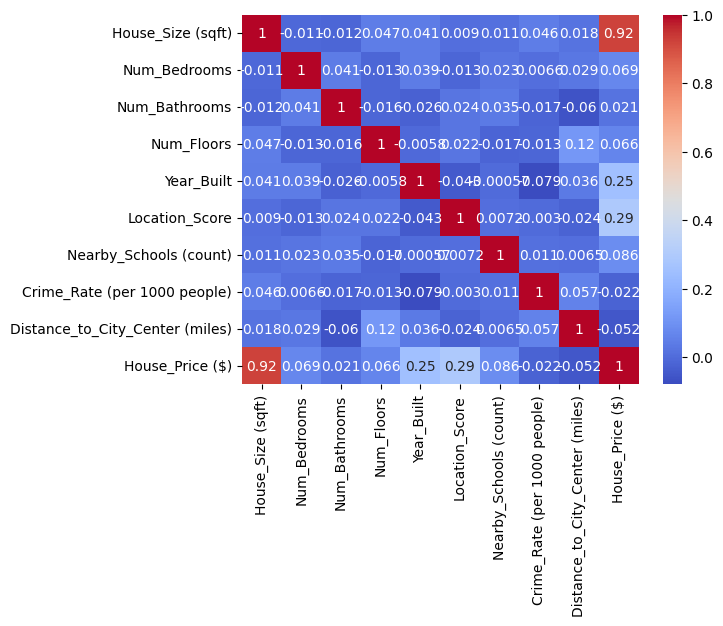

In [33]:
sns.heatmap(corelation, annot=True, cmap="coolwarm")
plt.show()

In [34]:
vdata = pd.DataFrame()
vdata["Feature"] = data.columns
vdata["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vdata)

                           Feature         VIF
0                House_Size (sqft)  130.838399
1                     Num_Bedrooms    5.895628
2                    Num_Bathrooms    6.885632
3                       Num_Floors    7.187921
4                       Year_Built   36.493469
5                   Location_Score   12.114205
6           Nearby_Schools (count)    3.707949
7     Crime_Rate (per 1000 people)    5.355654
8  Distance_to_City_Center (miles)    5.095581
9                  House_Price ($)  156.392855


In [35]:
data.drop(columns=["Num_Bathrooms", "Num_Floors", "Num_Bedrooms","Location_Score", "Nearby_Schools (count)"], inplace=True)

In [36]:
data["Age_of_House"]=2025-data["Year_Built"]
data.drop(columns=["Year_Built"], inplace=True)
data.head()

,House_Size (sqft),Crime_Rate (per 1000 people),Distance_to_City_Center (miles),House_Price ($),Age_of_House
0,1660,9.50,46.69,370810.0,22
1,4572,3.70,22.24,648460.0,75
2,3892,7.39,49.03,749600.0,32
3,1266,5.62,25.86,167180.0,31
4,4244,1.08,6.16,721200.0,29


In [37]:
# After preprocessing
co=data.corr()
print(data.corr())

                                 House_Size (sqft)  \
House_Size (sqft)                         1.000000   
Crime_Rate (per 1000 people)              0.045773   
Distance_to_City_Center (miles)           0.018404   
House_Price ($)                           0.921747   
Age_of_House                             -0.041368   

                                 Crime_Rate (per 1000 people)  \
House_Size (sqft)                                    0.045773   
Crime_Rate (per 1000 people)                         1.000000   
Distance_to_City_Center (miles)                      0.056652   
House_Price ($)                                     -0.021909   
Age_of_House                                         0.079472   

                                 Distance_to_City_Center (miles)  \
House_Size (sqft)                                       0.018404   
Crime_Rate (per 1000 people)                            0.056652   
Distance_to_City_Center (miles)                         1.000000   
House_Price 

In [12]:
vdata = pd.DataFrame()
vdata["Feature"] = data.columns
vdata["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vdata)

                           Feature        VIF
0                House_Size (sqft)  60.102921
1     Crime_Rate (per 1000 people)   4.322419
2  Distance_to_City_Center (miles)   3.749857
3                  House_Price ($)  53.611144
4                     Age_of_House   4.020245


In [14]:
x=data.drop(columns="House_Price ($)")
y=data["House_Price ($)"]/100000
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pre=lr.predict(x_test)
ms=mean_squared_error(y_test, y_pre)
r= r2_score(y_test, y_pre)
print("ms=",ms)
print("r2=",r)

ms= 0.3903229704764081
r2= 0.8966000931175009


In [16]:
scores = cross_val_score(lr, x, y, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {scores}")
print(f"Average R²: {scores.mean()}")

Cross-Validation R² Scores: [0.90047778 0.86987492 0.92008678 0.91382154 0.89090695]
Average R²: 0.8990335954296793


In [17]:
# for comparison:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.9385467830000002
R2 Score: 0.7513708971608303


In [18]:
# for comparison
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
#feature importances
importances = rf_model.feature_importances_
for feature, importance in zip(x.columns, importances):
    print(f"{feature}: {importance}")

MSE: 0.5063152824701104
R2 Score: 0.8658727335552496
House_Size (sqft): 0.8889821832262578
Crime_Rate (per 1000 people): 0.0218756237123545
Distance_to_City_Center (miles): 0.026339346406727072
Age_of_House: 0.06280284665466071


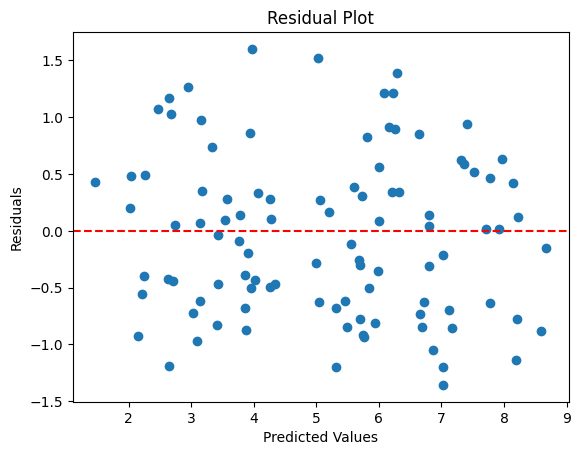

In [19]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

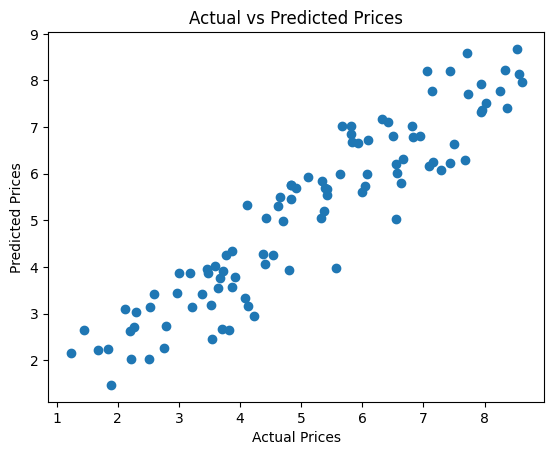

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


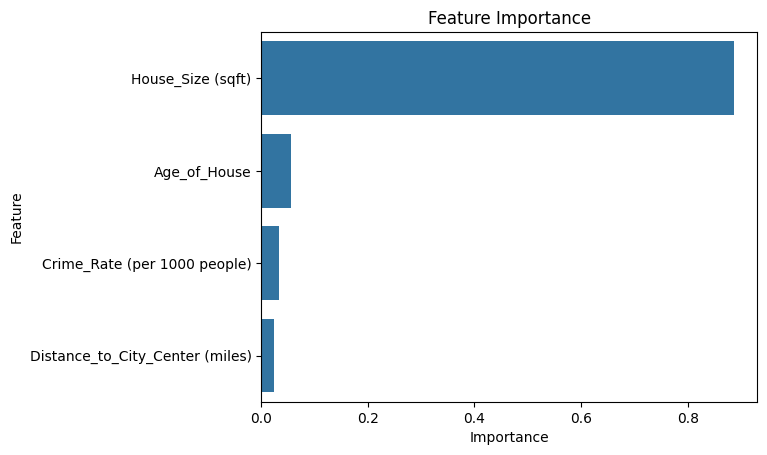

In [22]:
importances = model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

Epoch 10/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 20/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 30/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 40/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 50/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 60/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 70/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 80/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 90/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742
Epoch 100/100 - Train MSE: 3749074874.8290, Val MSE: 3920837940.5742


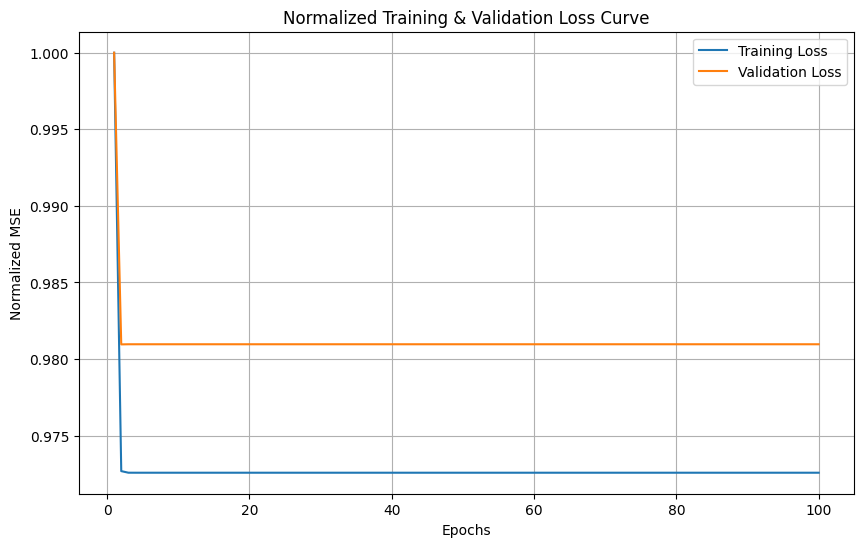

In [29]:
X=data.drop(columns="House_Price ($)")
y=data["House_Price ($)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize SGDRegressor
sgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, random_state=42)
train_loss = []
val_loss = []
n_epochs = 100
for epoch in range(n_epochs):
    sgd.partial_fit(X_train, y_train)
    y_train_pred = sgd.predict(X_train)
    y_val_pred = sgd.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_test, y_val_pred)
    train_loss.append(train_mse)
    val_loss.append(val_mse)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{n_epochs} - Train MSE: {train_mse:.4f}, Val MSE: {val_mse:.4f}")
train_loss = np.array(train_loss)
val_loss = np.array(val_loss)
train_loss_normalized = train_loss / np.max(train_loss)
val_loss_normalized = val_loss / np.max(val_loss)
epochs = range(1, len(train_loss) + 1)
# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss_normalized, label='Training Loss')
plt.plot(epochs, val_loss_normalized, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Normalized MSE')
plt.title('Normalized Training & Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.show()